In [ ]:
!nvidia-smi

Fri Feb  4 18:45:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


You must also install NVIDIA StyleGAN2 ADA PyTorch.

In [ ]:
!pip install torch
!pip install torchvision
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 128 (delta 19), reused 18 (delta 18), pack-reused 90
Receiving objects: 100% (128/128), 1.12 MiB | 2.00 MiB/s, done.
Resolving deltas: 100% (58/58), done.
ERROR: Operation cancelled by user


In [ ]:
!git clone https://github.com/NVlabs/stylegan3

Cloning into 'stylegan3'...
remote: Enumerating objects: 193, done.
remote: Total 193 (delta 0), reused 0 (delta 0), pack-reused 193
Receiving objects: 100% (193/193), 4.18 MiB | 33.15 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 17.4 MB 532 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.1 which is incompatible.
fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.
     |████████████████████████████████| 108 kB 4.3 MB/s 


# Convert Your Images

### Some issues getting certain images to work. I adjusted the dataset_tool to skip the images that were having issues and instead save the other ones. See below Screen shot

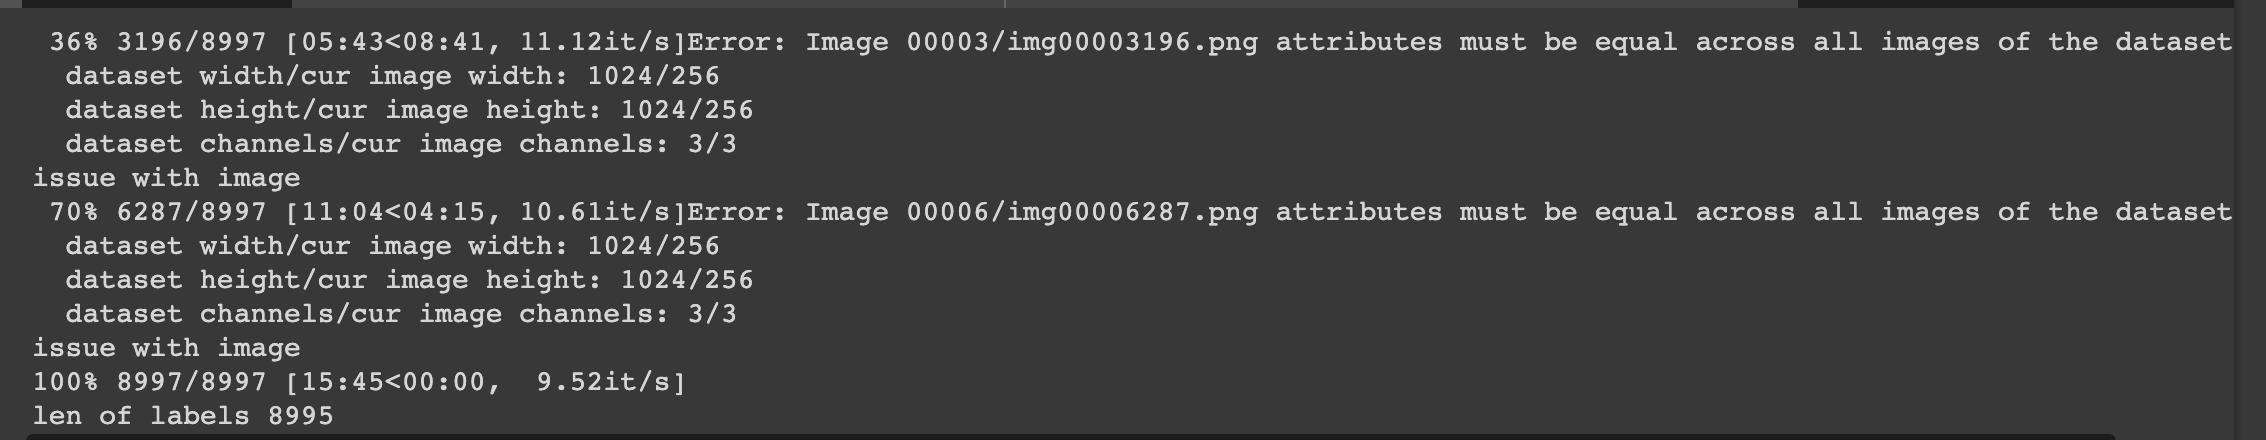

In [ ]:
!python /content/stylegan2-ada-pytorch/dataset_tool.py --source /content/drive/MyDrive/data/gan/training_images --dest /content/drive/MyDrive/data/gan/training_images_preprocessed

 32% 3192/9972 [06:06<10:26, 10.83it/s]Error: Image 00003/img00003192.png attributes must be equal across all images of the dataset.  Got:
  dataset width/cur image width: 1024/256
  dataset height/cur image height: 1024/256
  dataset channels/cur image channels: 3/3
one error, continue
 63% 6279/9972 [11:14<07:48,  7.88it/s]Error: Image 00006/img00006280.png attributes must be equal across all images of the dataset.  Got:
  dataset width/cur image width: 1024/256
  dataset height/cur image height: 1024/256
  dataset channels/cur image channels: 3/3
one error, continue
 90% 8992/9972 [15:50<01:33, 10.46it/s]Error: Image 00008/img00008992.png attributes must be equal across all images of the dataset.  Got:
  dataset width/cur image width: 1024/1024
  dataset height/cur image height: 1024/1024
  dataset channels/cur image channels: 3/4
one error, continue
Error: Image 00008/img00008993.png attributes must be equal across all images of the dataset.  Got:
  dataset width/cur image width: 1

The following command can be used to clear out the newly created dataset.  If something goes wrong and you need to clean up your images and rerun the above command, you should delete your partially created dataset directory.

# Clean Up your Images

It is important that all images have the same dimensions and color depth.  This code can identify images that have issues.

In [ ]:
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = '/content/drive/MyDrive/data/gan/training_images_preprocessed'
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]



base_size = None
for file in tqdm(files):
  try:
    file2 = os.path.join(IMAGE_PATH,file)
    img = Image.open(file2)
    sz = img.size
    if base_size and sz!=base_size:
      print(f"Inconsistant size: {file2}")
    elif img.mode!='RGB':
      print(f"Inconsistant color format: {file2}")
    else:
      base_size = sz
  except:
    print(file)


0it [00:00, ?it/s]

# Perform Initial Training

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"

SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --mirror=1"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 25,
  "network_snapshot_ticks": 25,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/pokemon_digimon_feb2022_preprocessed_1/",
    "use_labels": false,
    "max_size": 8990,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
 

# Resumption of Training (use code block Below!)



In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"
NETWORK = "network-snapshot-000500.pkl"
RESUME = os.path.join(EXPERIMENTS, "00232--mirror-auto1", NETWORK)
SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --resume {RESUME} --data {DATA} --mirror=1"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 25,
  "network_snapshot_ticks": 25,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/pokemon_digimon_feb2022_preprocessed_1/",
    "use_labels": false,
    "max_size": 8990,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
 

# The below code blocks are for trying different hyperparameter combinations on the GAN

In [ ]:
  --cfg [stylegan3-t|stylegan3-r|stylegan2]


In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"
NETWORK = "network-snapshot-000500.pkl"
RESUME = os.path.join(EXPERIMENTS, "00230--mirror-auto1-noaug-resumecustom", NETWORK)
SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --resume {RESUME}  --mirror=1 --aug=noaug"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 25,
  "network_snapshot_ticks": 25,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/pokemon_1024_preprocessed/",
    "use_labels": false,
    "max_size": 8995,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_b

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"
NETWORK = "network-snapshot-000500.pkl"
RESUME = os.path.join(EXPERIMENTS, "00220--mirror-auto1-noaug-resumecustom", NETWORK)
SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan3/train.py --cfg=stylegan3-t --gpus=1 --batch=8 --gamma=10 --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --resume {RESUME}  --mirror=1 --aug=noaug"
!{cmd}


Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 32768,
    "channel_max": 512,
    "magnitude_ema_beta": 0.9997227795604651
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0001
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 10.0,
    "blur_init_sigma": 0
  },
  "data_loader_kwargs": {
    "pin_memory

## Troubleshooting code version for GAN

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.5.1/local_installers/cuda-repo-ubuntu1804-11-5-local_11.5.1-495.29.05-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu1804-11-5-local_11.5.1-495.29.05-1_amd64.deb
!sudo apt-key add /var/cuda-repo-ubuntu1804-11-5-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get -y install cuda

--2021-12-13 05:41:15--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [application/octet-stream]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2021-12-13 05:41:15 (11.4 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2021-12-13 05:41:15--  https://developer.download.nvidia.com/compute/cuda/11.5.1/local_installers/cuda-repo-ubuntu1804-11-5-local_11.5.1-495.29.05-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
!sudo apt install nvidia-cuda-toolkit gcc-6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-6 fonts-dejavu-core fonts-dejavu-extra g++-6 gcc-6-base libaccinj64-9.1
  libasan3 libatk-wrapper-java libatk-wrapper-java-jni libcublas9.1
  libcudart9.1 libcufft9.1 libcufftw9.1 libcuinj64-9.1 libcurand9.1
  libcusolver9.1 libcusparse9.1 libgail-common libgail18 libgcc-6-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libnppc9.1 libnppial9.1
  libnppicc9.1 libnppicom9.1 libnppidei9.1 libnppif9.1 libnppig9.1 libnppim9.1
  libnppist9.1 libnppisu9.1 libnppitc9.1 libnpps9.1 libnvblas9.1 libnvgraph9.1
  libnvrtc9.1 libnvtoolsext1 libnvvm3 libstdc++-6-dev libthrust-dev
  libvdpau-dev libxxf86dga1 nvidia-cuda-dev nvidia-cuda-doc nvidia-cuda-gdb
  nvidia-profiler nvidia-visual-profiler openjdk-8-jre openjdk-8-jre-headless
  x11-utils
Suggested packages:
  gcc-6-locales g++-6-multilib gcc-6-doc libstdc++6-6-dbg gcc-6-multilib
  libgcc1-dbg

In [ ]:
!python -c "import torch; print(torch.version.cuda)"

11.1


# Training for StyleGAN2

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!python -c "import torch; print(torch.cuda.get_arch_list())"

['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']


In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (58/58), done.
     |████████████████████████████████| 108 kB 5.1 MB/s 


In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-000560.pkl"
RESUME = os.path.join(EXPERIMENTS, "00193--mirror-paper1024-ada-target0.1", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"

SNAP = 20

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --cfg=paper1024 --mirror=1"

!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 10,
  "network_snapshot_ticks": 10,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/pokemon_images_1024_preprocessed/",
    "use_labels": false,
    "max_size": 801,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "cha

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-000560.pkl"
RESUME = os.path.join(EXPERIMENTS, "00195--mirror-paper1024", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"

SNAP = 20

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA} --cfg=paper1024 --mirror=1"

!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 20,
  "network_snapshot_ticks": 20,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/pokemon_images_1024_preprocessed/",
    "use_labels": false,
    "max_size": 801,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 8
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "cha

In [ ]:
# If using A100 need to install below dependencies

# Depending on the GPU you get from Google Colabs, often need to modify the hardware setting on the GPU.
## For running this GPU, might need to change versions.

In [ ]:
!pip3 uninstall torch==1.9.0+rocm4.2 torchvision torchaudio -y

Found existing installation: torch 1.9.0+rocm4.2
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 657, in uninstall
    uninstalled_pathset = UninstallPathSet.from_dist(dist)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 527, in from_dist
    for path in uninstallation_paths(dist):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 60, in unique
    for item in fn(*args, **kw):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 78, in uninstallation_paths
    r = csv.reader(dist.get_meta

In [ ]:
!pip3 install torch==1.9 torchvision==0.10.0 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/rocm4.2/torchvision-0.10.0%2Brocm4.2-cp37-cp37m-linux_x86_64.whl (66.3 MB)
  Using cached torchaudio-0.9.0-cp37-cp37m-manylinux1_x86_64.whl (1.9 MB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/usr/local/lib/python3.7/dist-packages/torch-1.9.0+rocm4.2.dist-info/METADATA'



In [ ]:
!pip3 install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:38tcmalloc: large alloc 1147494400 bytes == 0x558bf7580000 @  0x7fb53fe8a615 0x558bbea5c4cc 0x558bbeb3c47a 0x558bbea5f2ed 0x558bbeb50e1d 0x558bbead2e99 0x558bbeacd9ee 0x558bbea60bda 0x558bbead2d00 0x558bbeacd9ee 0x558bbea60bda 0x558bbeacf737 0x558bbeb51c66 0x558bbeacedaf 0x558bbeb51c66 0x558bbeacedaf 0x558bbeb51c66 0x558bbeacedaf 0x558bbea61039 0x558bbeaa4409 0x558bbea5fc52 0x558bbead2c25 0x558bbeacd9ee 0x558bbea60bda 0x558bbeacf737 0x558bbeacd9ee 0x558bbea60bda 0x558bbeace915 0x558bbea60afa 0x558bbeacec0d 0x558bbeacd9ee
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:46tcmalloc: large alloc 1434370048 bytes == 0x558c3bbd6000 @  0x7fb53fe8a615 0x558bbea5c4cc 0x558bbeb3c47a 0x558bbea5f2ed 0x558bbeb50e1d 0x558bbead2e99 0x558bbeacd9ee 0x558bbea60bda 0x558bbead2d00 0x558bbeacd9ee 0x558bbea60bda 0x558bbeacf737 0x558bbeb51c66 0x558bbeaced

In [ ]:
!python3 -c "import torch; print(torch.__version__)"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'torch'


In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-000240.pkl"
RESUME = os.path.join(EXPERIMENTS, "00122--mirror-stylegan2-gamma15-ada-target0.8-bgc-resumecustom", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"

SNAP = 5

# Build the command and run it
#cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA} --batch {36} --cfg=stylegan2 --mirror=1 --aug=noaug"
#cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA} --cfg=stylegan2 --mirror=1 --augpipe=bgc --aug=ada --target=0.8 --gamma=15"
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA} --cfg=stylegan2 --mirror=1 --augpipe=noise --aug=ada --target=0.8 --gamma=15"



!{cmd}

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'

Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 50,
  "network_snapshot_ticks": 50,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/Flat_Curated_and_Pokemon_1024_Preprocessed/",
    "use_labels": false,
    "max_size": 1781,
    "xflip": true,
    "resolution": 1024
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 8
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {

In [ ]:
!pip3 install_gpu_driver.py

ERROR: unknown command "install_gpu_driver.py"


In [ ]:
!pip3 install ninja

# If running A100 ppl were suggesting you need to remove extensions and then let them rebuild

In [ ]:
!rm -r ~/.cache/torch_extensions/*

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



# Resume Training of StyleGAN@

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-000500.pkl"
RESUME = os.path.join(EXPERIMENTS, "00107--mirror-stylegan2-batch8-noaug", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"


SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA} --batch {8} --cfg=stylegan2 --mirror=1 --aug=noaug"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 25,
  "network_snapshot_ticks": 25,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/No_Background_Flat_Curated_and_Pokemon_Preprocessed/",
    "use_labels": false,
    "max_size": 1781,
    "xflip": true,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 8
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size"

# Resume Training

In [ ]:
import os

# Modify these to suit your needs
EXPERIMENTS = "/content/drive/MyDrive/data/gan/experiments"
NETWORK = "network-snapshot-001700.pkl"
RESUME = os.path.join(EXPERIMENTS, "00104--mirror-auto1-batch8", NETWORK)
DATA = "/content/drive/MyDrive/data/gan/training_images_preprocessed/"


SNAP = 25

# Build the command and run it
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA} --batch {16} --cfg=stylegan2 --mirror=1 --aug=noaug"
!{cmd}


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 25,
  "network_snapshot_ticks": 25,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/drive/MyDrive/data/gan/No_Background_Flat_Curated_and_Pokemon_Preprocessed/",
    "use_labels": false,
    "max_size": 1781,
    "xflip": true,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 8
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size"

In [ ]:
cmd = f"/usr/bin/python3 /content/stylegan3/train.py --help"
!{cmd}

Usage: train.py [OPTIONS]

  Train a GAN using the techniques described in
  the paper "Alias-Free Generative Adversarial
  Networks".

  Examples:

  # Train StyleGAN3-T for AFHQv2 using 8 GPUs.
  python train.py --outdir=~/training-runs --cfg=stylegan3-t --data=~/datasets/afhqv2-512x512.zip \
      --gpus=8 --batch=32 --gamma=8.2 --mirror=1

  # Fine-tune StyleGAN3-R for MetFaces-U using 1 GPU, starting from the pre-trained FFHQ-U pickle.
  python train.py --outdir=~/training-runs --cfg=stylegan3-r --data=~/datasets/metfacesu-1024x1024.zip \
      --gpus=8 --batch=32 --gamma=6.6 --mirror=1 --kimg=5000 --snap=5 \
      --resume=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl

  # Train StyleGAN2 for FFHQ at 1024x1024 resolution using 8 GPUs.
  python train.py --outdir=~/training-runs --cfg=stylegan2 --data=~/datasets/ffhq-1024x1024.zip \
      --gpus=8 --batch=32 --gamma=10 --mirror=1 --aug=noaug

Options:
  --outdir DIR 

In [ ]:
cmd = f"/usr/bin/python3 /content/stylegan2-ada-pytorch/train.py --help"
!{cmd}

Usage: train.py [OPTIONS]

  Train a GAN using the techniques described in
  the paper "Training Generative Adversarial
  Networks with Limited Data".

  Examples:

  # Train with custom dataset using 1 GPU.
  python train.py --outdir=~/training-runs --data=~/mydataset.zip --gpus=1

  # Train class-conditional CIFAR-10 using 2 GPUs.
  python train.py --outdir=~/training-runs --data=~/datasets/cifar10.zip \
      --gpus=2 --cfg=cifar --cond=1

  # Transfer learn MetFaces from FFHQ using 4 GPUs.
  python train.py --outdir=~/training-runs --data=~/datasets/metfaces.zip \
      --gpus=4 --cfg=paper1024 --mirror=1 --resume=ffhq1024 --snap=10

  # Reproduce original StyleGAN2 config F.
  python train.py --outdir=~/training-runs --data=~/datasets/ffhq.zip \
      --gpus=8 --cfg=stylegan2 --mirror=1 --aug=noaug

  Base configs (--cfg):
    auto       Automatically select reasonable defaults based on resolution
               and GPU count. Good starting point for new datasets.
    stylegan2  R